## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [2]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# 讀取鳶尾花資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

In [4]:
clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
    presort=False
)


In [5]:
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [6]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8444444444444444


In [7]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.03311974 0.         0.         0.         0.04544912 0.
 0.04432968 0.         0.         0.34772309 0.         0.12839175
 0.40098662]


In [9]:
df = pd.DataFrame([clf.feature_importances_])
df.columns = wine.feature_names

In [10]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.03312,0.0,0.0,0.0,0.045449,0.0,0.04433,0.0,0.0,0.347723,0.0,0.128392,0.400987


In [11]:
from sklearn import tree
tree.plot_tree(clf)

[Text(248.0, 332.64, 'X[12] <= 755.0\nentropy = 0.652\nsamples = 133\nvalue = [44, 56, 33]'),
 Text(124.0, 258.71999999999997, 'X[9] <= 4.85\nentropy = 0.482\nsamples = 84\nvalue = [2, 53, 29]'),
 Text(62.0, 184.8, 'X[11] <= 1.48\nentropy = 0.138\nsamples = 55\nvalue = [2, 51, 2]'),
 Text(31.0, 110.88, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(93.0, 110.88, 'X[0] <= 13.145\nentropy = 0.073\nsamples = 53\nvalue = [2, 51, 0]'),
 Text(62.0, 36.960000000000036, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(124.0, 36.960000000000036, 'entropy = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(186.0, 184.8, 'X[6] <= 2.375\nentropy = 0.128\nsamples = 29\nvalue = [0, 2, 27]'),
 Text(155.0, 110.88, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27]'),
 Text(217.0, 110.88, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(372.0, 258.71999999999997, 'X[11] <= 2.49\nentropy = 0.255\nsamples = 49\nvalue = [42, 3, 4]'),
 Text(310.0, 184.8, 'X[0] <= 12.725\nentropy = 0.32\

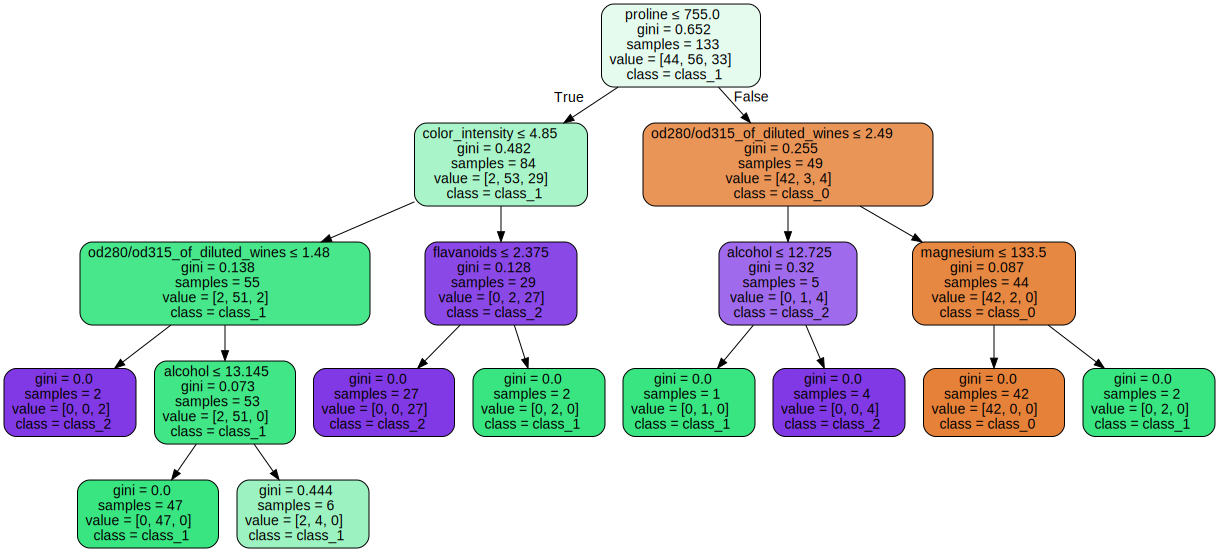

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=wine.feature_names,  
                     class_names=wine.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 